# Melhorando a saúde mental dos estudantes durante o ensino remoto

## Planejamento:
			
* Definir os objetivos do projeto:
* Estabelecer um cronograma: Ao menos duas reuniões para discutir o projeto antes da data de entrega.
* Dividisão de tarefas
* Identificar recursos: pandas, numpy, ferramentas de visualização gráfica (plotly, matplotlib, seaborn), scipy e scikit-learn.
* Estabelecer critérios de avaliação: Critérios de avaliação seguindo os critérios SMART.
* Revisar e refinar o plano: Análises retroativas do domínio de negócios e compreensão dos dados.


## Identificação do problema:
* Como podemos melhorar a saúde mental e o bem-estar dos estudantes da Universátil durante o ensino remoto?

### Contexto:
* Pandemia global
* Ensino remoto
* Interações sociais limitadas
* Pressões externas

### Requisitos do negócio:
* Identificar as principais variáveis relacionadas à saúde mental dos estudantes
* Testar hipóteses sobre as estratégias para melhorar a saúde mental dos estudantes
* Avaliar a eficácia das soluções propostas

## Pesquisa:

### Terminologia:
* Saúde Mental: A Organização Mundial da Saúde (OMS) define saúde mental como “um estado de bem-estar mental que permite às pessoas lidar com os momentos estressantes da vida, desenvolver todas as suas habilidades, aprender e trabalhar bem e contribuir para a melhoria de sua comunidade”.

* O que determina a saúde mental: 
* Fatores biológicos, psicológicos, ambientais, sociais, de estilo de vida e *socioeconômicos*.

* Ensino Remoto Emergencial (ERE): Ocorre num tempo síncrono (acompanhando os princípios do ensino presencial), com videoaula, aula expositiva por sistema de webconferência, e as atividades seguem durante a semana no espaço de um ambiente virtual de aprendizagem (AVA) de forma assíncrona.

* GAD-7 (General Anxiety Disorder-7): A GAD-7 é uma escala criada por Spitzer et al., em 2005, com objetivo de ser uma medida breve de autorrelato para avaliação de casos prováveis de TAG (Transtorno de Ansiedade Generalizada). A escala é composta por 7 itens e seus itens estão dispostos em 4 pontos, que variam entre 0 (nenhuma vez) a 3 (quase todos os dias) em escala do tipo Likert. **Ao rastrear transtornos de ansiedade, uma pontuação de 10 ou mais representa um ponto de corte razoável para identificar casos prováveis de transtorno de ansiedade generalizada.**

## Referências:
* https://blog.bettha.com/tecnica-smart/#:~:text=A%20t%C3%A9cnica%20SMART%20%C3%A9%20o,n%C3%A3o%20s%C3%A3o%20as%20mesmas%20coisas%3F
* https://www.scielo.br/j/csp/a/ZXCDZcC7mWmZc4x8gKMSmrz/?lang=en
* https://www.paho.org/pt/topicos/transtornos-mentais#:~:text=Os%20determinantes%20da%20sa%C3%BAde%20mental,como%20as%20pol%C3%ADticas%20nacionais%2C%20a
* https://tcc.fps.edu.br/jspui/bitstream/fpsrepo/1464/1/Pandemia%20da%20Covid-19%20repercuss%C3%A3o%20na%20sa%C3%BAde%20mental%2C%20motiva%C3%A7%C3%A3o%20e%20ensino%20dos%20estudantes%20de%20medicina.pdf



# Manipulação do Dataset

In [60]:
import pandas as pd

import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [61]:
df = pd.read_csv("dataset.tsv", sep = "\t")
df.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,uf,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,RA55000001,Osane Inácio Pinhal Ouro,19,418.0,1,2,3,1,5,Viela Vinte e Sete de Setembro,...,SP,04235-090,1,1,1,1,1,1,1,9
1,RA55000002,Zezita Olivares Ferro Telinhos,19,279.0,1,2,3,1,2,Rua Marechal Marques Porto,...,SP,03906-020,0,1,1,1,1,1,1,10
2,RA55000003,Orleis Bilhalva Pereira Moita,19,87.0,1,1,3,1,9,Rua Vinte de Março,...,SP,02326-115,1,0,1,1,1,1,1,10
3,RA55000004,Kaiuan Félix,19,243.0,1,1,3,1,9,Rua João Pires,...,SP,03168-060,1,1,1,1,1,1,1,9
4,RA55000005,Geovan Quaresma Lameirinhas,19,348.0,1,1,3,1,6,Rua São João,...,SP,02920-050,1,1,1,1,1,1,1,9


# Limpeza das colunas que não são relevantes no contexto

In [62]:
df.drop(["matrícula", "nome", "cor", "sexo", "escola", "cod_curso", "logradouro", "numero", "bairro", "cidade", "uf", "cep"], axis=1, inplace=True)
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,19,418.00,3,1,1,1,1,1,1,1,9
1,19,279.00,3,0,1,1,1,1,1,1,10
2,19,87.00,3,1,0,1,1,1,1,1,10
3,19,243.00,3,1,1,1,1,1,1,1,9
4,19,348.00,3,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...
495,31,22669.71,2,2,2,2,1,1,1,1,1
496,45,229643.80,1,2,2,2,2,2,2,2,1
497,32,572939.98,5,2,2,2,2,1,1,1,1
498,34,898004.00,5,1,1,1,1,1,1,1,0


# Distribuição dos dados de renda

In [63]:
fig = px.histogram(df, "renda", text_auto=True, width=1200, height=800)
fig.update_traces(textposition="outside")

fig.show()

# Remoção dos outliers de renda

In [64]:
df["renda"] = df[df["renda"] <= 22000]["renda"]
df = df.dropna()
df.dropna()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,19,418.00,3,1,1,1,1,1,1,1,9
1,19,279.00,3,0,1,1,1,1,1,1,10
2,19,87.00,3,1,0,1,1,1,1,1,10
3,19,243.00,3,1,1,1,1,1,1,1,9
4,19,348.00,3,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0
491,29,17336.61,5,2,2,2,2,2,2,2,1
492,33,20678.88,1,2,2,2,2,2,2,1,0
493,48,16439.16,2,2,2,2,2,2,2,1,0


In [65]:
df.describe()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,21.040404,2426.037596,3.614141,1.480808,1.454545,1.329293,1.212121,1.254545,1.278788,1.272727,6.012121
std,4.527735,2284.473237,0.974680,0.592749,0.631057,0.549798,0.563260,0.583038,0.585809,0.600576,3.151995
min,19.000000,87.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1178.490000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
50%,20.000000,1907.980000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
75%,20.000000,2685.280000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000
max,50.000000,21470.140000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000


# Matriz de correlação inicial

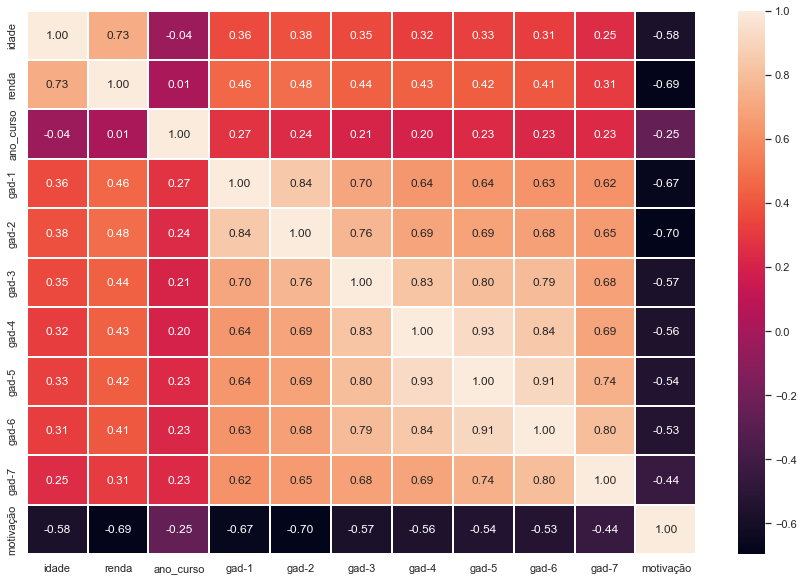

In [66]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()


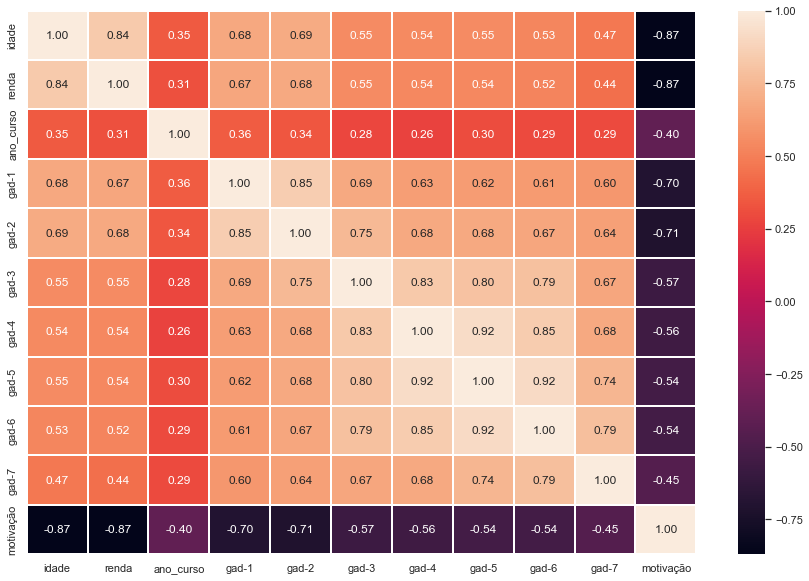

In [67]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()


## Análise e hipóteses: 
### Fatores principais de influência para a saúde mental (GAD-7):
* Idade
* Renda
* Motivação

### Conclusão:
* Há forte correlação entre GAD-7/renda/idade e motivação, dando indícios que a motivação possa ser uma variável dependente útil

# Adiciona uma coluna com o score total

In [68]:
df['total score'] = df.iloc[:, 3:9].sum(axis=1)
df

C:\Users\fabri\AppData\Local\Temp\ipykernel_2528\2028562622.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
0,19,418.00,3,1,1,1,1,1,1,1,9,6
1,19,279.00,3,0,1,1,1,1,1,1,10,5
2,19,87.00,3,1,0,1,1,1,1,1,10,5
3,19,243.00,3,1,1,1,1,1,1,1,9,6
4,19,348.00,3,1,1,1,1,1,1,1,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12
491,29,17336.61,5,2,2,2,2,2,2,2,1,12
492,33,20678.88,1,2,2,2,2,2,2,1,0,12
493,48,16439.16,2,2,2,2,2,2,2,1,0,12


In [69]:
fig = px.histogram(df, "idade", text_auto=True, width=1200, height=800)
fig.update_traces(textposition="outside")

fig.show()

In [70]:
fig = px.histogram(df, "renda", text_auto=True, width=1200, height=800)
fig.update_traces(textposition="outside")

fig.show()

In [71]:
fig = px.histogram(df, "motivação", text_auto=True, width=1200, height=800)
fig.update_traces(textposition="outside")

fig.show()

In [72]:
fig = px.histogram(df, "total score", text_auto=True, width=1200, height=800)
fig.update_traces(textposition="outside")

fig.show()

In [73]:
df.describe()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,21.040404,2426.037596,3.614141,1.480808,1.454545,1.329293,1.212121,1.254545,1.278788,1.272727,6.012121,8.010101
std,4.527735,2284.473237,0.974680,0.592749,0.631057,0.549798,0.563260,0.583038,0.585809,0.600576,3.151995,3.128474
min,19.000000,87.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1178.490000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000
50%,20.000000,1907.980000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000
75%,20.000000,2685.280000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,12.000000
max,50.000000,21470.140000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,18.000000


## Média dos valores após remoção dos outliers:
* Idade: 21
* Renda: R$ 2426
* Motivação: 6
* Score total do GAD-7: 8

# Divisão por faixas salarias de acordo com o IBGE

In [74]:
sal_min = 1302
def classes(renda):
    if renda <= sal_min:
        return "E"
    elif renda <= (2*sal_min):
        return "D"
    elif renda <= (3*sal_min):
        return "C"
    elif renda <= (5*sal_min):
        return "B"
    elif renda >= (5*sal_min):
        return "A"
df['classe'] = df['renda'].apply(classes)

C:\Users\fabri\AppData\Local\Temp\ipykernel_2528\476106331.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



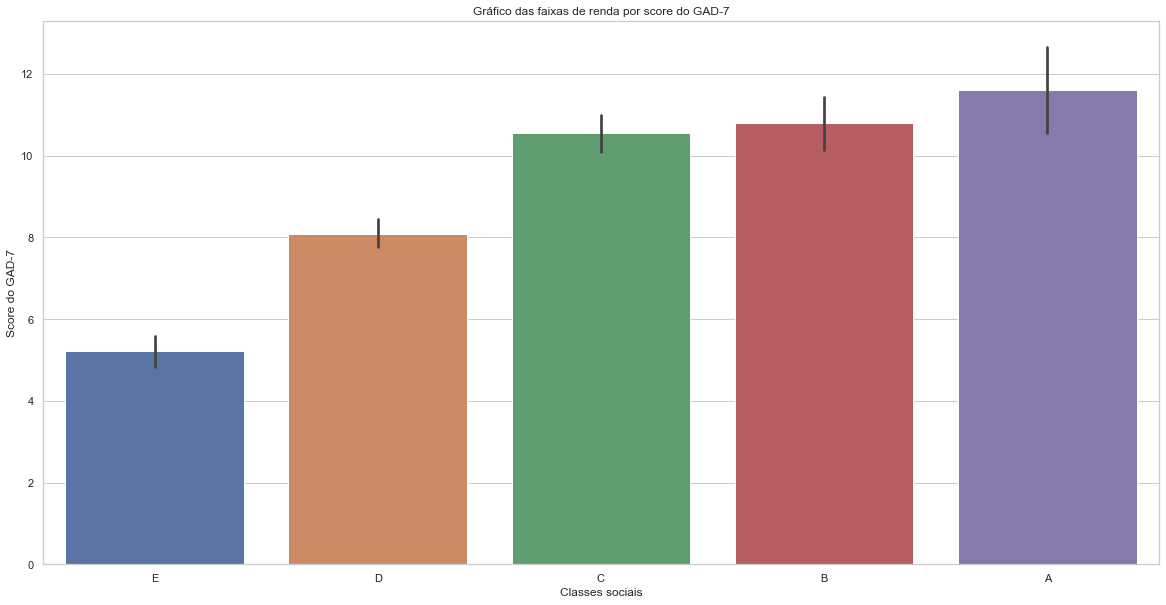

In [75]:
graph1 = sns.barplot(data=df, x="classe", y="total score")
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Classes sociais")
plt.ylabel("Score do GAD-7")
plt.title("Gráfico das faixas de renda por score do GAD-7")
plt.show()

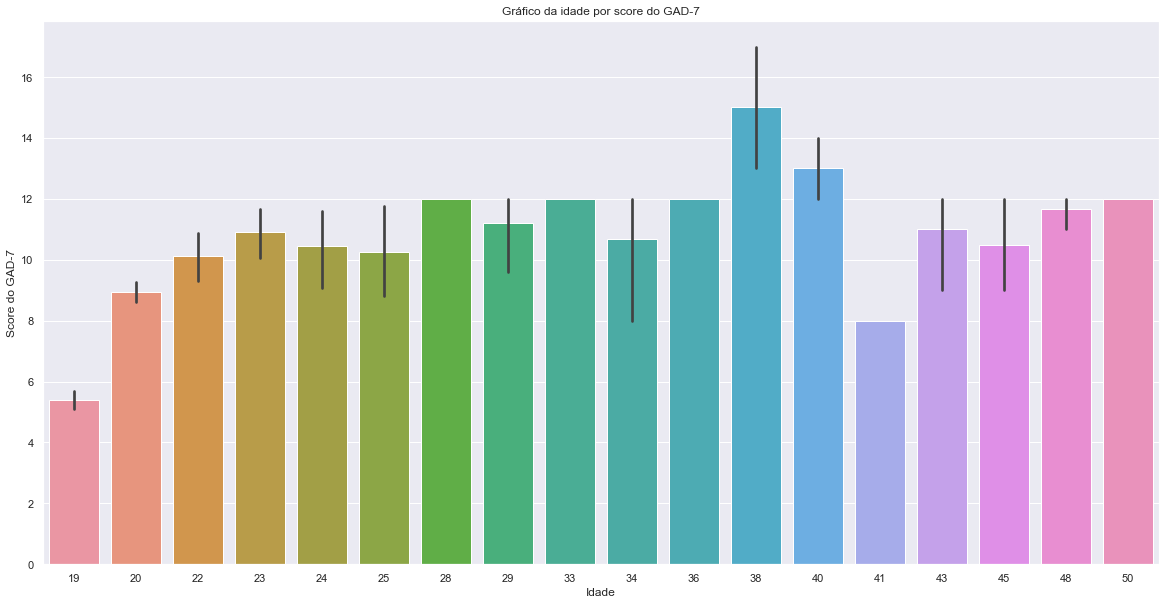

In [76]:
graph2 = sns.barplot(data=df, x="idade", y="total score")
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Idade")
plt.ylabel("Score do GAD-7")
plt.title("Gráfico da idade por score do GAD-7")
plt.show()

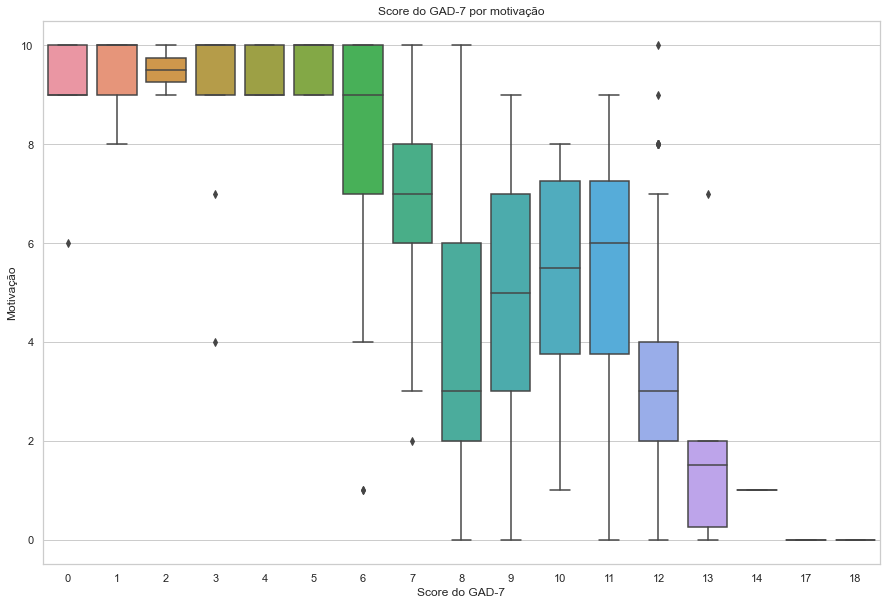

In [77]:
sns.set_style("whitegrid") 
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="total score", y="motivação")
plt.title('Score do GAD-7 por motivação')
plt.xlabel('Score do GAD-7')
plt.ylabel('Motivação')
plt.show()

c:\Users\fabri\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning:

The following kwargs were not used by contour: 'linewidth'



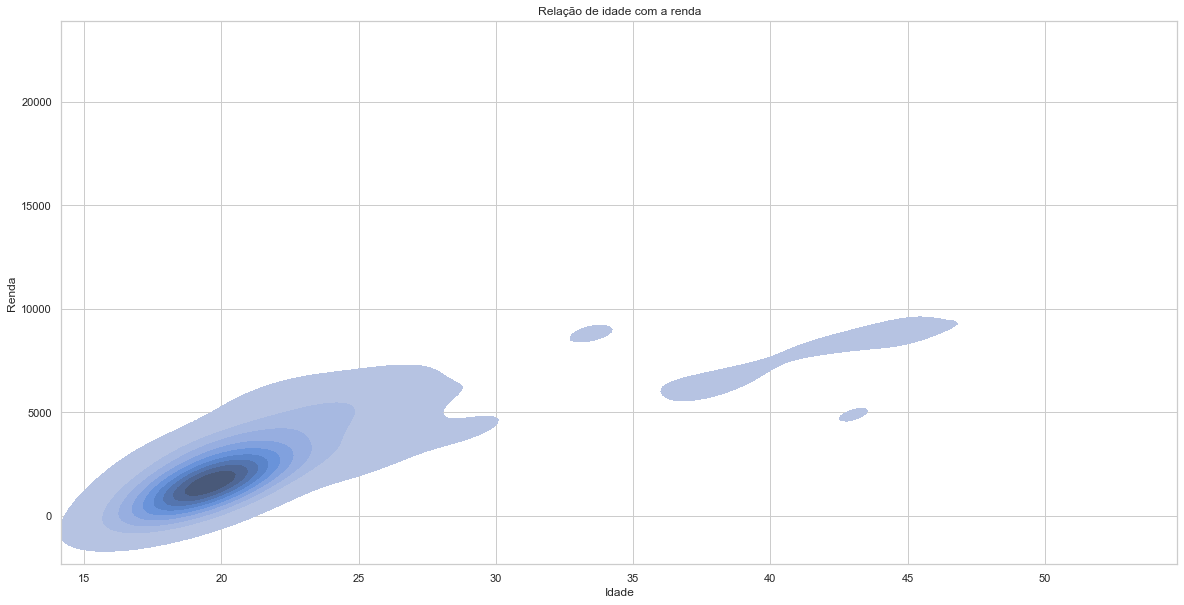

In [78]:
sns.set_style("whitegrid")

sns.kdeplot(data=df, x="idade", y="renda", fill=True, shade=True, alpha=1, linewidth=0)
plt.title("Relação de idade com a renda")
plt.xlabel("Idade")
plt.ylabel("Renda")
plt.show()

c:\Users\fabri\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning:

The following kwargs were not used by contour: 'linewidth'



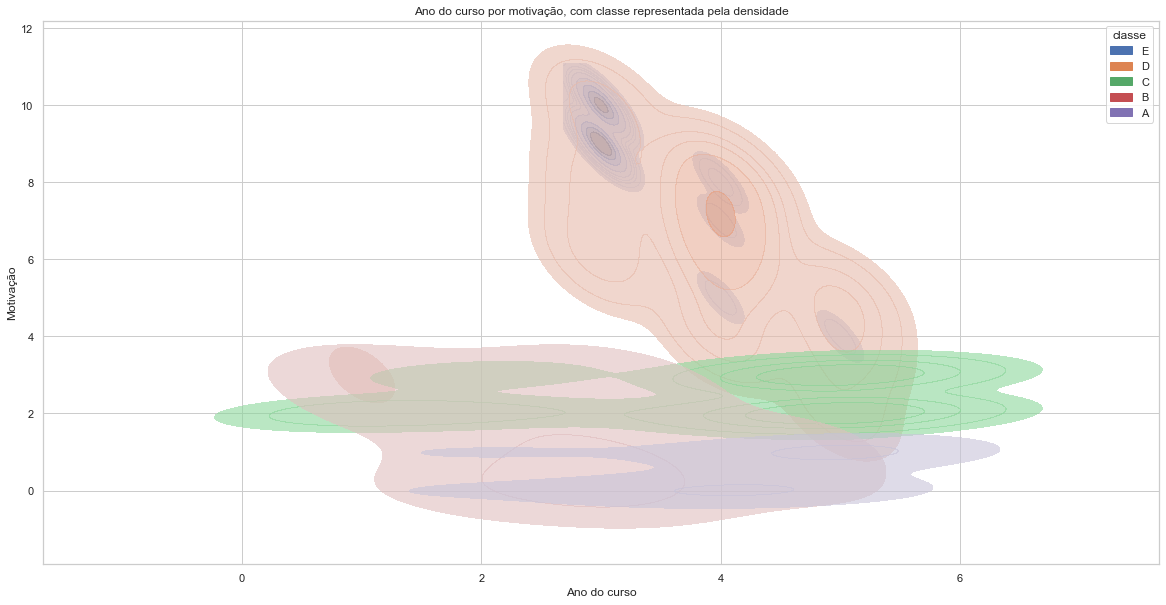

In [79]:
sns.set_style("whitegrid")

sns.kdeplot(data=df, x="ano_curso", y="motivação", hue="classe", fill=True, common_norm=True, alpha=.6, linewidth=0)

plt.title("Ano do curso por motivação, com classe representada pela densidade")
plt.xlabel("Ano do curso")
plt.ylabel("Motivação")
plt.show()

## Análise dos gráficos:

### Conclusões:
* A renda é diretamente proporcional ao GAD-7, porque conforme a renda aumenta o GAD-7. Indo em contrapartida do raciocínio de que quanto maior a renda, menor o GAD-7. 
* A motivação é inversamente proporcional ao score do GAD-7.
* GAD-7 tem uma relação bem definida até os 25 anos. Porém, não tem uma relação bem definida com o renda a partir dos 25 anos, depois ele estabiliza. 
* O ano do curso tem relação com a motivação, que por consequência influencia no GAD-7.

In [80]:
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score,classe
0,19,418.00,3,1,1,1,1,1,1,1,9,6,E
1,19,279.00,3,0,1,1,1,1,1,1,10,5,E
2,19,87.00,3,1,0,1,1,1,1,1,10,5,E
3,19,243.00,3,1,1,1,1,1,1,1,9,6,E
4,19,348.00,3,1,1,1,1,1,1,1,9,6,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12,A
491,29,17336.61,5,2,2,2,2,2,2,2,1,12,A
492,33,20678.88,1,2,2,2,2,2,2,1,0,12,A
493,48,16439.16,2,2,2,2,2,2,2,1,0,12,A


In [81]:
max(df.idade)

50

In [82]:
df['classe'] = df['renda'].apply(classes)

C:\Users\fabri\AppData\Local\Temp\ipykernel_2528\209678642.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score,classe
0,19,418.00,3,1,1,1,1,1,1,1,9,6,E
1,19,279.00,3,0,1,1,1,1,1,1,10,5,E
2,19,87.00,3,1,0,1,1,1,1,1,10,5,E
3,19,243.00,3,1,1,1,1,1,1,1,9,6,E
4,19,348.00,3,1,1,1,1,1,1,1,9,6,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12,A
491,29,17336.61,5,2,2,2,2,2,2,2,1,12,A
492,33,20678.88,1,2,2,2,2,2,2,1,0,12,A
493,48,16439.16,2,2,2,2,2,2,2,1,0,12,A


In [84]:
main = pd.read_csv("dataset.tsv", sep = "\t")
main.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,uf,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,RA55000001,Osane Inácio Pinhal Ouro,19,418.0,1,2,3,1,5,Viela Vinte e Sete de Setembro,...,SP,04235-090,1,1,1,1,1,1,1,9
1,RA55000002,Zezita Olivares Ferro Telinhos,19,279.0,1,2,3,1,2,Rua Marechal Marques Porto,...,SP,03906-020,0,1,1,1,1,1,1,10
2,RA55000003,Orleis Bilhalva Pereira Moita,19,87.0,1,1,3,1,9,Rua Vinte de Março,...,SP,02326-115,1,0,1,1,1,1,1,10
3,RA55000004,Kaiuan Félix,19,243.0,1,1,3,1,9,Rua João Pires,...,SP,03168-060,1,1,1,1,1,1,1,9
4,RA55000005,Geovan Quaresma Lameirinhas,19,348.0,1,1,3,1,6,Rua São João,...,SP,02920-050,1,1,1,1,1,1,1,9


In [85]:
main

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,uf,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,RA55000001,Osane Inácio Pinhal Ouro,19,418.00,1,2,3,1,5,Viela Vinte e Sete de Setembro,...,SP,04235-090,1,1,1,1,1,1,1,9
1,RA55000002,Zezita Olivares Ferro Telinhos,19,279.00,1,2,3,1,2,Rua Marechal Marques Porto,...,SP,03906-020,0,1,1,1,1,1,1,10
2,RA55000003,Orleis Bilhalva Pereira Moita,19,87.00,1,1,3,1,9,Rua Vinte de Março,...,SP,02326-115,1,0,1,1,1,1,1,10
3,RA55000004,Kaiuan Félix,19,243.00,1,1,3,1,9,Rua João Pires,...,SP,03168-060,1,1,1,1,1,1,1,9
4,RA55000005,Geovan Quaresma Lameirinhas,19,348.00,1,1,3,1,6,Rua São João,...,SP,02920-050,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RA55000496,Dorielma Farinha Angelim,31,22669.71,1,2,2,2,6,Viela Treze de Abril,...,SP,08150-750,2,2,2,1,1,1,1,1
496,RA55000497,Carlene Barra Girão Quesado,45,229643.80,1,2,1,2,1,Rua Sargento Olício Alves,...,SP,04455-180,2,2,2,2,2,2,2,1
497,RA55000498,Dinalia Neves Carmona Serpa,32,572939.98,2,2,5,2,6,Rua Dona Domitila,...,SP,03882-180,2,2,2,2,1,1,1,1
498,RA55000499,Agni Andrade Vidigal,34,898004.00,1,1,5,2,9,Rua Dom Pedro,...,SP,04470-037,1,1,1,1,1,1,1,0


## Regressão linear

À partir das variáveis (gad-1, gad-2, gad-3, gad-4, gad-5, gad-6, gad-7) prever a variável "motivação"

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [87]:
len(main)

500

In [88]:
new_main = main

In [89]:
len(new_main)

500

In [90]:
X = new_main[["gad-1", "gad-2", "gad-3", "gad-4", "gad-5", "gad-6", "gad-7"]]
X

,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7
0,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1
2,1,0,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
495,2,2,2,1,1,1,1
496,2,2,2,2,2,2,2
497,2,2,2,2,1,1,1
498,1,1,1,1,1,1,1


In [91]:
y = new_main["motivação"]
y

0       9
1      10
2      10
3       9
4       9
       ..
495     1
496     1
497     1
498     0
499     1
Name: motivação, Length: 500, dtype: int64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.5814930922839741

 Conclusão: o modelo de regressão linear obteve um R2 de 0.5814..., o que significa que o modelo não é muito bom para prever a motivação dos estudantes, mas é melhor que um modelo aleatório.



### Gráfico da regressão linear (predição x real)
Neste gráfico temos a motivação real (y_test) e a motivação predita (y_pred), juntas a uma linha azul que é o resultado da regressão.

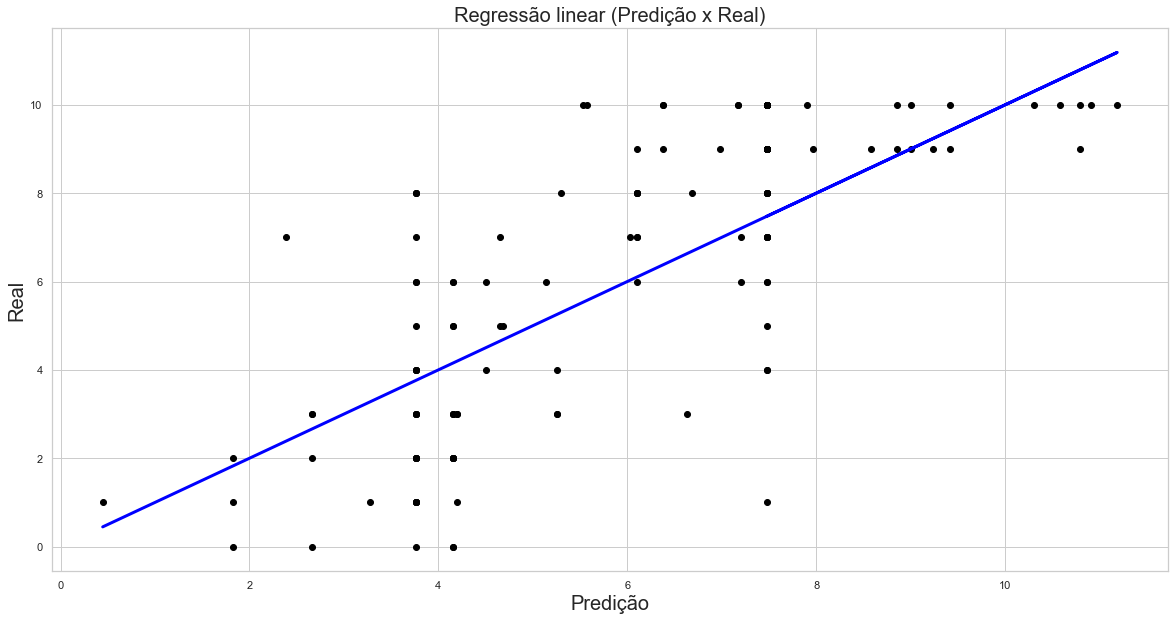

In [93]:
plt.scatter(y_pred, y_test,  color='black')
plt.plot(y_pred, y_pred, color='blue', linewidth=3)
plt.title("Regressão linear (Predição x Real)").set_fontsize(20)
plt.xlabel("Predição").set_fontsize(20)
plt.ylabel("Real").set_fontsize(20)
plt.show()

# Padronização e normalização dos dados

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [95]:
df.head()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score,classe
0,19,418.0,3,1,1,1,1,1,1,1,9,6,E
1,19,279.0,3,0,1,1,1,1,1,1,10,5,E
2,19,87.0,3,1,0,1,1,1,1,1,10,5,E
3,19,243.0,3,1,1,1,1,1,1,1,9,6,E
4,19,348.0,3,1,1,1,1,1,1,1,9,6,E


In [96]:
df.dtypes

idade            int64
renda          float64
ano_curso        int64
gad-1            int64
gad-2            int64
gad-3            int64
gad-4            int64
gad-5            int64
gad-6            int64
gad-7            int64
motivação        int64
total score      int64
classe          object
dtype: object

In [97]:
df['renda'] = df['renda'].apply(int)

C:\Users\fabri\AppData\Local\Temp\ipykernel_2528\1598516189.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
df['total score'] = df['total score'].apply(int)

C:\Users\fabri\AppData\Local\Temp\ipykernel_2528\366605573.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
newdf = df.drop("classe", axis='columns')

# Padronização

In [100]:
obj_padronizado = StandardScaler().fit(newdf)
df_padronizado = obj_padronizado.transform(newdf)
df_padronizado

array([[-0.45110148, -0.87958913, -0.63073254, ..., -0.45456865,
         0.94889141, -0.64316812],
       [-0.45110148, -0.94049406, -0.63073254, ..., -0.45456865,
         1.2664717 , -0.96313618],
       [-0.45110148, -1.02462173, -0.63073254, ..., -0.45456865,
         1.2664717 , -0.96313618],
       ...,
       [ 2.64407998,  7.99763267, -2.68476287, ..., -0.45456865,
        -1.90933119,  1.27664024],
       [ 5.96034582,  6.14025146, -1.65774771, ..., -0.45456865,
        -1.90933119,  1.27664024],
       [ 1.75974242,  8.3446593 ,  0.39628262, ...,  1.21218305,
        -1.90933119,  1.27664024]])

In [101]:
newdf.head()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
0,19,418,3,1,1,1,1,1,1,1,9,6
1,19,279,3,0,1,1,1,1,1,1,10,5
2,19,87,3,1,0,1,1,1,1,1,10,5
3,19,243,3,1,1,1,1,1,1,1,9,6
4,19,348,3,1,1,1,1,1,1,1,9,6


In [102]:
# Transformando para DataFrame e nomeando as colunas
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ["idade", "renda", "ano_curso", "gad-1", "gad-2", "gad-3", "gad-4", "gad-5", "gad-6", "gad-7",
                          "motivacao", "total score"]

# Visualizando os dados padronizados
df_padronizado.head()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivacao,total score
0,-0.451101,-0.879589,-0.630733,-0.811970,-0.721021,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569,0.948891,-0.643168
1,-0.451101,-0.940494,-0.630733,-2.500731,-0.721021,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569,1.266472,-0.963136
2,-0.451101,-1.024622,-0.630733,-0.811970,-2.307266,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569,1.266472,-0.963136
3,-0.451101,-0.956268,-0.630733,-0.811970,-0.721021,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569,0.948891,-0.643168
4,-0.451101,-0.910261,-0.630733,-0.811970,-0.721021,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569,0.948891,-0.643168


# Normalização

In [103]:
obj_normalizado = MinMaxScaler().fit(newdf)
df_normalizado = obj_normalizado.transform(newdf)
df_normalizado

array([[0.        , 0.01547959, 0.5       , ..., 0.33333333, 0.9       ,
        0.33333333],
       [0.        , 0.0089791 , 0.5       , ..., 0.33333333, 1.        ,
        0.27777778],
       [0.        , 0.        , 0.5       , ..., 0.33333333, 1.        ,
        0.27777778],
       ...,
       [0.4516129 , 0.96296123, 0.        , ..., 0.33333333, 0.        ,
        0.66666667],
       [0.93548387, 0.76471964, 0.25      , ..., 0.33333333, 0.        ,
        0.66666667],
       [0.32258065, 1.        , 0.75      , ..., 0.66666667, 0.        ,
        0.66666667]])

In [104]:
# Transformando para DataFrame e nomeando as colunas
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ["idade", "renda", "ano_curso", "gad-1", "gad-2", "gad-3", "gad-4", "gad-5", "gad-6", "gad-7",
                          "motivacao", "total score"]

# Visualizando os dados padronizados
df_normalizado.head()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivacao,total score
0,0.0,0.015480,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.9,0.333333
1,0.0,0.008979,0.5,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,0.277778
2,0.0,0.000000,0.5,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,0.277778
3,0.0,0.007296,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.9,0.333333
4,0.0,0.012206,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.9,0.333333


# Regressão linear (dados padronizados e normalizados)

In [105]:
X1 = df_padronizado[["gad-1", "gad-2", "gad-3", "gad-4", "gad-5", "gad-6", "gad-7"]]
X1

,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7
0,-0.811970,-0.721021,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569
1,-2.500731,-0.721021,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569
2,-0.811970,-2.307266,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569
3,-0.811970,-0.721021,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569
4,-0.811970,-0.721021,-0.59954,-0.376977,-0.437026,-0.476383,-0.454569
...,...,...,...,...,...,...,...
490,0.876791,0.865225,1.22115,1.400199,1.279862,1.232383,1.212183
491,0.876791,0.865225,1.22115,1.400199,1.279862,1.232383,1.212183
492,0.876791,0.865225,1.22115,1.400199,1.279862,1.232383,-0.454569
493,0.876791,0.865225,1.22115,1.400199,1.279862,1.232383,-0.454569


In [106]:
y1 = df_padronizado["motivacao"]
y1

0      0.948891
1      1.266472
2      1.266472
3      0.948891
4      0.948891
         ...   
490   -1.909331
491   -1.591751
492   -1.909331
493   -1.909331
494   -1.909331
Name: motivacao, Length: 495, dtype: float64

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.5319127735408871

In [115]:
X2 = df_normalizado[["gad-1", "gad-2", "gad-3", "gad-4", "gad-5", "gad-6", "gad-7"]]
X2

,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7
0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
2,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333
3,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
4,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...
490,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
491,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
492,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333
493,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333


In [116]:
y2 = df_normalizado["motivacao"]
y2

0      0.9
1      1.0
2      1.0
3      0.9
4      0.9
      ... 
490    0.0
491    0.1
492    0.0
493    0.0
494    0.0
Name: motivacao, Length: 495, dtype: float64

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

0.5319127735408872

# Análise do dataset original para identificação de indivíduos em risco

In [111]:
main2 = pd.read_csv("dataset.tsv", sep = "\t")
main2.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,uf,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,RA55000001,Osane Inácio Pinhal Ouro,19,418.0,1,2,3,1,5,Viela Vinte e Sete de Setembro,...,SP,04235-090,1,1,1,1,1,1,1,9
1,RA55000002,Zezita Olivares Ferro Telinhos,19,279.0,1,2,3,1,2,Rua Marechal Marques Porto,...,SP,03906-020,0,1,1,1,1,1,1,10
2,RA55000003,Orleis Bilhalva Pereira Moita,19,87.0,1,1,3,1,9,Rua Vinte de Março,...,SP,02326-115,1,0,1,1,1,1,1,10
3,RA55000004,Kaiuan Félix,19,243.0,1,1,3,1,9,Rua João Pires,...,SP,03168-060,1,1,1,1,1,1,1,9
4,RA55000005,Geovan Quaresma Lameirinhas,19,348.0,1,1,3,1,6,Rua São João,...,SP,02920-050,1,1,1,1,1,1,1,9


In [112]:
main2['total score'] = main2.iloc[:, 16:22].sum(axis=1)
main2

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
0,RA55000001,Osane Inácio Pinhal Ouro,19,418.00,1,2,3,1,5,Viela Vinte e Sete de Setembro,...,04235-090,1,1,1,1,1,1,1,9,6
1,RA55000002,Zezita Olivares Ferro Telinhos,19,279.00,1,2,3,1,2,Rua Marechal Marques Porto,...,03906-020,0,1,1,1,1,1,1,10,6
2,RA55000003,Orleis Bilhalva Pereira Moita,19,87.00,1,1,3,1,9,Rua Vinte de Março,...,02326-115,1,0,1,1,1,1,1,10,5
3,RA55000004,Kaiuan Félix,19,243.00,1,1,3,1,9,Rua João Pires,...,03168-060,1,1,1,1,1,1,1,9,6
4,RA55000005,Geovan Quaresma Lameirinhas,19,348.00,1,1,3,1,6,Rua São João,...,02920-050,1,1,1,1,1,1,1,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RA55000496,Dorielma Farinha Angelim,31,22669.71,1,2,2,2,6,Viela Treze de Abril,...,08150-750,2,2,2,1,1,1,1,1,8
496,RA55000497,Carlene Barra Girão Quesado,45,229643.80,1,2,1,2,1,Rua Sargento Olício Alves,...,04455-180,2,2,2,2,2,2,2,1,12
497,RA55000498,Dinalia Neves Carmona Serpa,32,572939.98,2,2,5,2,6,Rua Dona Domitila,...,03882-180,2,2,2,2,1,1,1,1,9
498,RA55000499,Agni Andrade Vidigal,34,898004.00,1,1,5,2,9,Rua Dom Pedro,...,04470-037,1,1,1,1,1,1,1,0,6


In [113]:
col = ['total score']

main2[col] = main2[main2[col] >= 10][col]
main2 = main2.dropna()
main2.dropna()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
54,RA55000055,Otavio Nascimento Seabra,19,1010.99,1,1,3,1,9,Rua João Pujol,...,03471-020,1,1,2,1,2,2,2,9,10.0
62,RA55000063,Alvacir Cobra Nobre Camargo,19,792.99,1,1,3,1,1,Rua Onofre Pinto,...,08441-211,1,2,2,2,2,2,2,9,12.0
72,RA55000073,Edete Inácio Furtado Canadas,19,821.99,1,2,3,1,7,Rua Manuel Pinto,...,05776-460,2,2,2,2,2,2,2,9,12.0
121,RA55000122,Hidetoshi Quesado Ferro,19,722.99,1,1,3,1,4,Rua Almeida Araújo,...,08470-815,2,2,2,2,2,2,2,10,12.0
157,RA55000158,Adebrair Mamouros,19,1901.98,1,1,3,2,2,Avenida Marechal Tito,...,08160-495,2,2,2,1,1,2,2,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,RA55000493,Eberto Bragança Damasceno,33,20678.88,1,1,1,2,2,Avenida Nove de Julho,...,01407-902,2,2,2,2,2,2,1,0,11.0
493,RA55000494,Avelino Janes,48,16439.16,1,1,2,2,3,Rua Marechal Malet,...,03140-020,2,2,2,2,2,2,1,0,11.0
494,RA55000495,Carlete Galindo,29,21470.14,1,2,4,2,5,Rua São João,...,08346-405,2,2,2,2,2,2,2,0,12.0
496,RA55000497,Carlene Barra Girão Quesado,45,229643.80,1,2,1,2,1,Rua Sargento Olício Alves,...,04455-180,2,2,2,2,2,2,2,1,12.0


Conclusão: 165 alunos em prováveis condições de transtorno de ansiedade generalizada